Yapay Zeka ile Müşteri Segmentasyonu

AVM yönetimi müşterilerin verilerine göre gruplama yapacaktır.

K-means algoritması kullanarak öncelikle müşterilerin kaç gruba ayrılacağını belirleyeceğiz. Sonra da tüm müşterileri gruplara dahil edeceğiz.

In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Avm_Musterileri.csv')
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


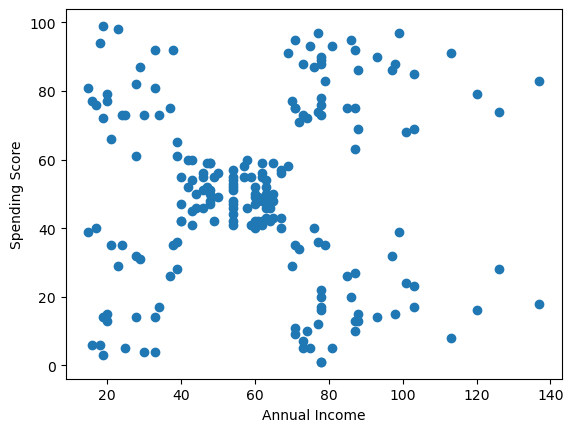

In [10]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Bazı sütun isimlerini kısaltalım:

In [13]:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

Verileri normaliza edelim

In [22]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler nesnesini oluştur
scaler = MinMaxScaler()

# 'income' ve 'score' sütunlarını ayrı ayrı ölçeklendirip DataFrame'e ekle
df['income_scaled'] = scaler.fit_transform(df[['income']])
df['score_scaled'] = scaler.fit_transform(df[['score']])

df = df.drop(columns=['income', 'score'])
df.head()

,CustomerID,income_scaled,score_scaled
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


K-means modeli oluşturup fit ediyoruz.

In [51]:
kmeans = KMeans(n_clusters = 5)
y_predicted = kmeans.fit_predict(df[['income_scaled','score_scaled']])
y_predicted

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

Tahmin edilen değerleri bir sütun olarak ekliyoruz.

In [54]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income_scaled,score_scaled,cluster
0,1,0.000000,0.387755,2
1,2,0.000000,0.816327,3
2,3,0.008197,0.051020,2
3,4,0.008197,0.775510,3
4,5,0.016393,0.397959,2


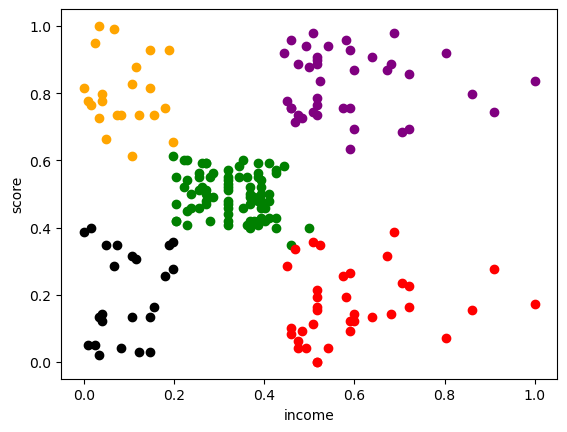

In [56]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income_scaled'],df1['score_scaled'],color='green')
plt.scatter(df2['income_scaled'],df2['score_scaled'],color='red')
plt.scatter(df3['income_scaled'],df3['score_scaled'],color='black')
plt.scatter(df4['income_scaled'],df4['score_scaled'],color='orange')
plt.scatter(df5['income_scaled'],df5['score_scaled'],color='purple')